In [31]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
#from matplotlib import rc
%matplotlib inline
#%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets


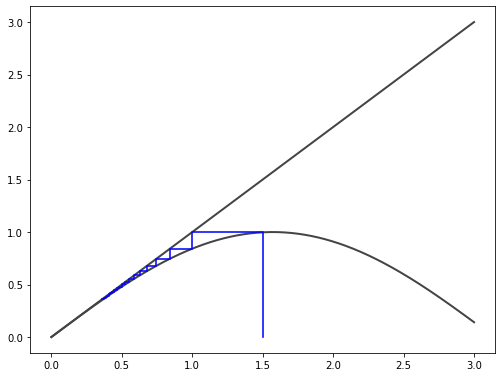

In [45]:
# Use LaTeX throughout the figure for consistency
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
#c('text', usetex=True)
# Figure dpi
dpi = 72

def plot_cobweb(f, r, x0, xmax=1, nmax=40):
    """Make a cobweb plot.

    Plot y = f(x; r) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0. r is a parameter to the function.

    """
    x = np.linspace(0, xmax, 500)
    fig = plt.figure(figsize=(600/dpi, 450/dpi), dpi=dpi)
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x, r), c='#444444', lw=2)
    ax.plot(x, x, c='#444444', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1], r)
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7)
    plt.show()
    # Annotate and tidy the plot.
#    ax.minorticks_on()
#    ax.grid(which='minor', alpha=0.5)
#    ax.grid(which='major', alpha=0.5)
#    ax.set_aspect('equal')
#    ax.set_xlabel('$x$')
#    ax.set_ylabel(f.latex_label)
#    ax.set_title('$x_0 = {:.1}, r = {:.2}$'.format(x0, r))
#
#    plt.savefig('cobweb_{:.1}_{:.2}.png'.format(x0, r), dpi=dpi)



# The logistic map, f(x) = rx(1-x).
#func = AnnotatedFunction(lambda x,r: r*x*(1-x), r'$rx(1-x)$')
func = lambda x,r: r*x*(1-x)
func_xr = lambda x,r: x**r
func_sin = lambda x,r: r*np.sin(x)
plot_cobweb(func_sin, r= 1, x0=1.5, xmax=3, nmax=40)
#plot_cobweb(func, 3.8, 0.2, 200)

In [2]:
def logistic_one(r,x0,N):
    x = x0
    ys=[]
    ys.append(x)
    for i in range(N):
        x = f(x, r)
        ys.append(x)

    return ys


def logist_plot(r,x0,N):
    plt.plot(logistic_one(r,x0,N),'x-')
    plt.ylim(0,1)

In [46]:
mylayout=Layout(width='10cm')
interact(logist_plot, r=widgets.FloatSlider(min=0.9, max=3.9, step=0.1, value=1., description='r:',
                                  continuous_update=False,layout=mylayout,readout=True, readout_format='.1f'),
            x0=widgets.Dropdown(
                options=[0.1, 0.25, 0.5, 0.75],
                value=0.25,
                description='x0:',
                disabled=True,),
            N=widgets.IntSlider(min=10, max=400, step=10, value=20, description='N:',
                                  continuous_update=False,layout=mylayout,readout=True, readout_format='.1f')
             )

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='r:', layout=Layout(width='1…

<function __main__.logist_plot(r, x0, N)>

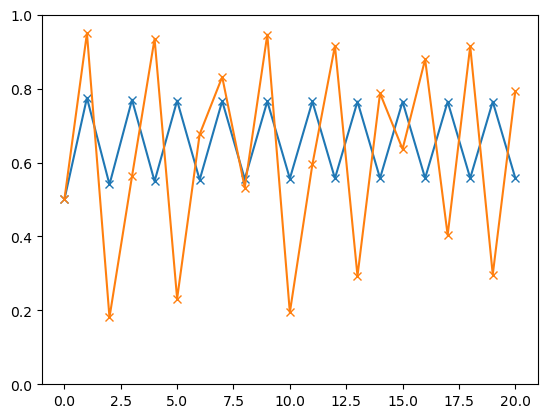

In [71]:
xmax=20
#logist_plot(2.9,0.5,xmax)
logist_plot(3.1,0.5,xmax)
#logist_plot(3.4491,0.5,xmax)
#logist_plot(3.54409,0.5,xmax)
#logist_plot(3.55644,0.5,xmax)
logist_plot(3.79946,0.5,xmax)

/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_27493/3247555206.py:2: RuntimeWarning: overflow encountered in double_scalars
  return r * x * (1 - x)


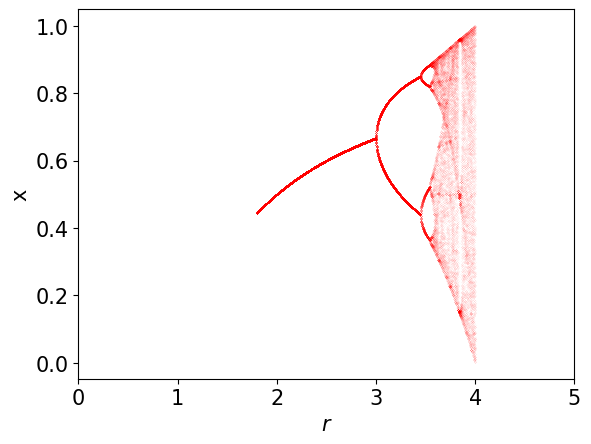

In [80]:


def f(x, r):
    return r * x * (1 - x)


ys = []
rs = np.linspace(1.8, 5.1, 2000)
#rs = np.linspace(3.5, 4, 2000) # For Figure 14.16.
for r in rs:
    x = 0.1
    for i in range(500):
        x = f(x, r)
    for i in range(50):
        x = f(x, r)
        ys.append([r, x])

ys = np.array(ys)

plt.plot(ys[:, 0], ys[:, 1], 'r.', markersize=0.05)
plt.xlabel('$r$', fontsize=15)
plt.ylabel('x', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(0,5)
plt.show()


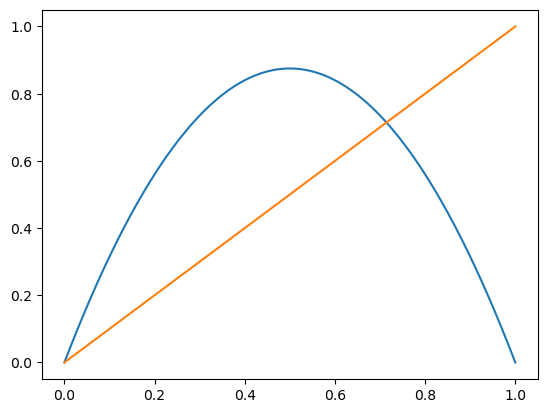

In [6]:
x = np.linspace(0, 1, 200)
plt.plot(x,f(x,3.5))
plt.plot(x,x)